## Introduction
In this notebook, we will:
- Use the California Housing data set included in scikit-learn to predict the median house price based on various attributes
- Create a random forest regression model and evaluate its performance
- Investigate the feature importances for the model 


our goal in this notebook is **not** to find the best regressor - it is primarily intended for we to practice interpreting modelling results in the context of a real-world problem.


Before we start, make sure that all the required libraries are installed. Execute the cell below for the same.


## Import the required libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import skew

### Load the California Housing data set


In [2]:
# Load the dataset
data = fetch_california_housing()
X, y = data.data, data.target

### Print the description of the California Housing data set


In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

### Split the data into training and testing sets
Reserve 20% of the data for evaluation


In [4]:
# Enter our code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Explore the training data


In [5]:
eda = pd.DataFrame(data=X_train)
eda.columns = data.feature_names
eda['MedHouseVal'] = y_train
eda.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
mean       3.880754     28.608285      5.435235      1.096685   1426.453004   
std        1.904294     12.602499      2.387375      0.433215   1137.056380   
min        0.499900      1.000000      0.888889      0.333333      3.000000   
25%        2.566700     18.000000      4.452055      1.006508    789.000000   
50%        3.545800     29.000000      5.235874      1.049286   1167.000000   
75%        4.773175     37.000000      6.061037      1.100348   1726.000000   
max       15.000100     52.000000    141.909091     25.636364  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  16512.000000  16512.000000  16512.000000  16512.000000  
mean       3.096961     35.643149   -119.582290      2.071947  
std       11.578744      2.136665      2.005654      1.156226  
min        0.692308     32.550000   -124.350000      0.149990  
25%        2.428799     33.930000   -121.810000      1.198000  
50%        2.817240     34.260000   -118.510000      1.798500  
75%        3.280000     37.720000   -118.010000      2.651250  
max     1243.333333     41.950000   -114.310000      5.000010

### How are the median house prices distributed?


Text(0, 0.5, 'Frequency')

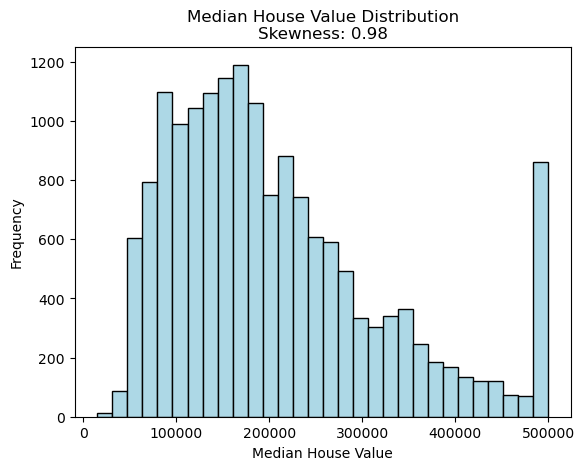

In [6]:
# Plot the distribution
plt.hist(1e5*y_train, bins=30, color='lightblue', edgecolor='black')
plt.title(f'Median House Value Distribution\nSkewness: {skew(y_train):.2f}')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

Evidently the distribution is skewed and there are quite a few clipped values at around $500,000. 


### Model fitting and prediction
Let's fit a random forest regression model to the data and use it to make median house price predicions.
Use the default parameters, which includes using 100 base estimators, or regression trees.


In [7]:
# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on test set
y_pred_test = rf_regressor.predict(X_test)

### Estimate out-of-sample MAE, MSE, RMSE, and R²


In [8]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.3275
Mean Squared Error (MSE): 0.2554
Root Mean Squared Error (RMSE): 0.5053
R² Score: 0.8051


### What do these statistics mean to we?
How comfortable could we be with stopping here and communicating the results to the C-suite?


### Plot Actual vs Predicted values


The mean absolute error is $33,220.</p>

<p>So, on average, predicted median house prices are off by \$33k.</p>
Mean squared error is less intuitive to interpret, but is usually what is being minimized by the model fit. 

On the other hand, taking the square root of MSE yields a dollar value, here RMSE = \$50,630.

An R-squared score of 0.80 is not considered very high. It means the model explains about %80 of the variance in median house prices, although this interpretation can be misleading for compex data with nonlinear relationships, skewed values, and outliers. R-squard can still be useful for comparing models though.

These statistics alone don't explain any details about the performance of the model. 
For example, where did the model do well or poorly? 

We aren't done yet!

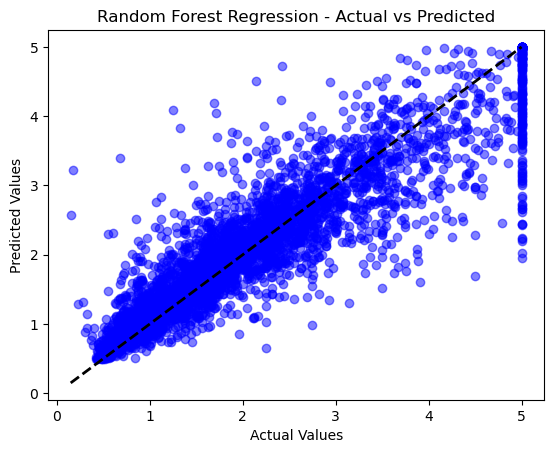

In [9]:
plt.scatter(y_test, y_pred_test, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression - Actual vs Predicted")
plt.show()

### Plot the histogram of the residual errors (dollars)
Also, print the mean and standard deviation of the residuals.
Check for any patterns.


Average error = -1242
Standard deviation of error = 50518


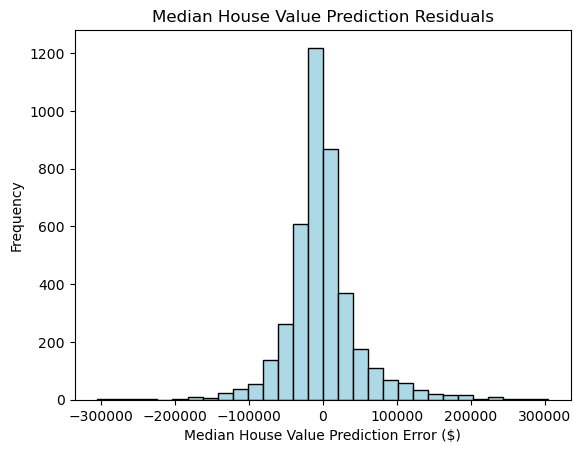

In [10]:
# Enter our code here
# Calculate the residual errors
residuals = 1e5*(y_test - y_pred_test)

# Plot the histogram of the residuals
plt.hist(residuals, bins=30, color='lightblue', edgecolor='black')
plt.title(f'Median House Value Prediction Residuals')
plt.xlabel('Median House Value Prediction Error ($)')
plt.ylabel('Frequency')
print('Average error = ' + str(int(np.mean(residuals))))
print('Standard deviation of error = ' + str(int(np.std(residuals))))

The residuals are normally distributed with a very small average error and a standard deviation of about \$50,000.


### Plot the model residual errors by median house value.
Sort the residuals by actual median house value before plotting the residuals.

Check for any patterns.


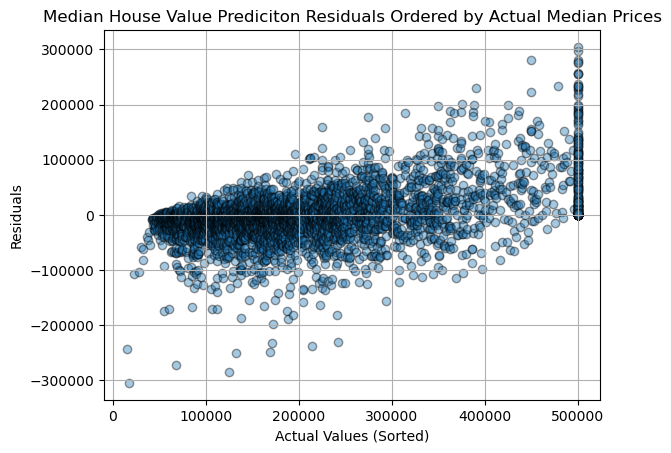

In [12]:
# Create a DataFrame to make sorting easy
residuals_df = pd.DataFrame({
    'Actual': 1e5*y_test,
    'Residuals': residuals
})

# Sort the DataFrame by the actual target values
residuals_df = residuals_df.sort_values(by='Actual')

# Plot the residuals
plt.scatter(residuals_df['Actual'], residuals_df['Residuals'], marker='o', alpha=0.4,ec='k')
plt.title('Median House Value Prediciton Residuals Ordered by Actual Median Prices')
plt.xlabel('Actual Values (Sorted)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


### Display the feature importances as a bar chart.
Do we think these feature weights have practial significance? Are any of the features possibly sharing importance with other correlated features?


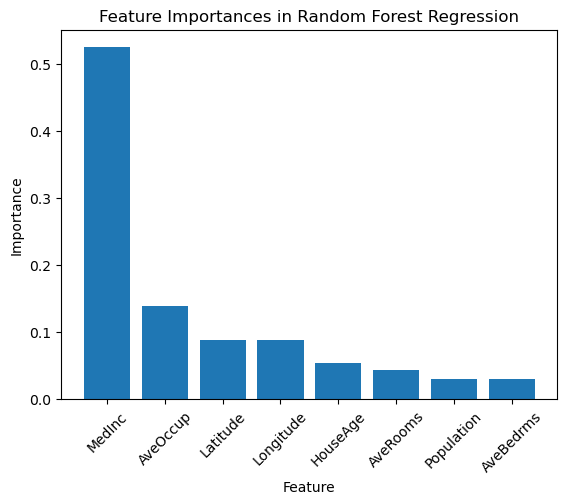

In [13]:
# Feature importances
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]
features = data.feature_names

# Plot feature importances
plt.bar(range(X.shape[1]), importances[indices],  align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances in Random Forest Regression")
plt.show()